In [2]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [3]:
# Let's initialize the inputs as linearly spaced 100 points between -20 and 20
x = np.linspace(-20,20,100)
x

array([-20.        , -19.5959596 , -19.19191919, -18.78787879,
       -18.38383838, -17.97979798, -17.57575758, -17.17171717,
       -16.76767677, -16.36363636, -15.95959596, -15.55555556,
       -15.15151515, -14.74747475, -14.34343434, -13.93939394,
       -13.53535354, -13.13131313, -12.72727273, -12.32323232,
       -11.91919192, -11.51515152, -11.11111111, -10.70707071,
       -10.3030303 ,  -9.8989899 ,  -9.49494949,  -9.09090909,
        -8.68686869,  -8.28282828,  -7.87878788,  -7.47474747,
        -7.07070707,  -6.66666667,  -6.26262626,  -5.85858586,
        -5.45454545,  -5.05050505,  -4.64646465,  -4.24242424,
        -3.83838384,  -3.43434343,  -3.03030303,  -2.62626263,
        -2.22222222,  -1.81818182,  -1.41414141,  -1.01010101,
        -0.60606061,  -0.2020202 ,   0.2020202 ,   0.60606061,
         1.01010101,   1.41414141,   1.81818182,   2.22222222,
         2.62626263,   3.03030303,   3.43434343,   3.83838384,
         4.24242424,   4.64646465,   5.05050505,   5.45

In [4]:
# Now, let's build a function that we will later approximate using linear regression
import random

# I am choosing random integers as parameters to find out after curve fitting
y = random.randint(1,10) * x + random.randint(1,10)

# adding some noise or else it won't be much of a challenge
y += 15 * np.random.randn(100)
y

array([-56.73429691, -38.45544231, -95.24221204, -18.5253052 ,
       -75.26982494, -31.33024584, -77.16863646, -53.28640583,
       -31.80832936, -57.57827698, -38.2563873 , -49.79761211,
       -31.37376433, -51.84052896, -37.69721761, -39.30452642,
       -29.09892718, -34.5257332 , -23.22431372, -52.17462126,
       -39.79760408, -43.665352  ,  -0.96489482, -34.91606642,
       -22.71175002, -12.09398337, -40.61369685, -22.80657775,
       -15.91851993,   0.30864755, -16.78152892,  -8.84720261,
       -36.7551809 , -16.18275055, -10.67203524,  -2.09440464,
       -20.4048876 , -49.45293728, -17.80499748,   4.13539899,
       -24.04404087,  27.29012394, -21.89667832, -30.34627104,
         2.8117243 ,  11.1973417 ,  18.02568563,  24.4761127 ,
        -1.17617059,  -5.78572075, -18.09233481,   0.99640754,
         2.82586053, -11.69802116,   4.08613649,  18.31960909,
        -3.00005277,  30.44392995,  35.49255323,  24.76241141,
         9.1342418 ,  23.4124878 ,  -5.22910388,  27.57

<IPython.core.display.Javascript object>


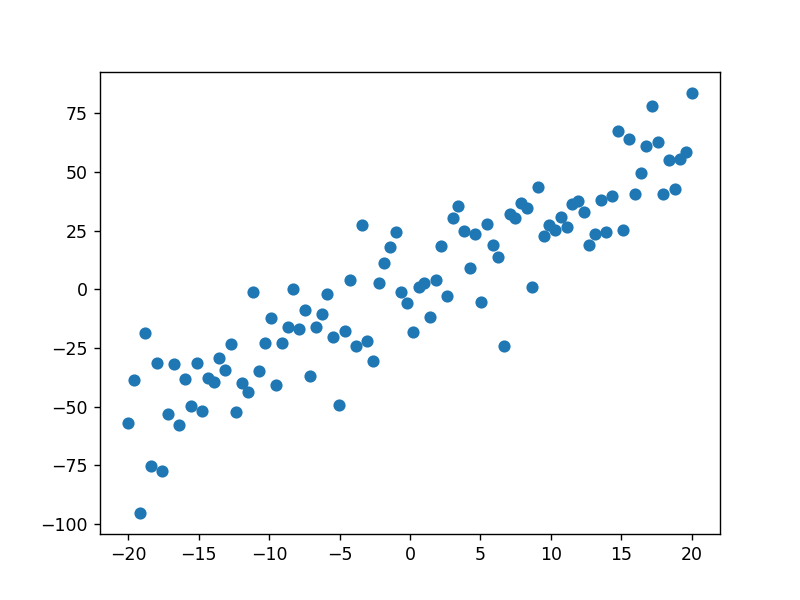

In [5]:
# Let's visualize the data now
plt.scatter(x,y)
plt.show()

<IPython.core.display.Javascript object>


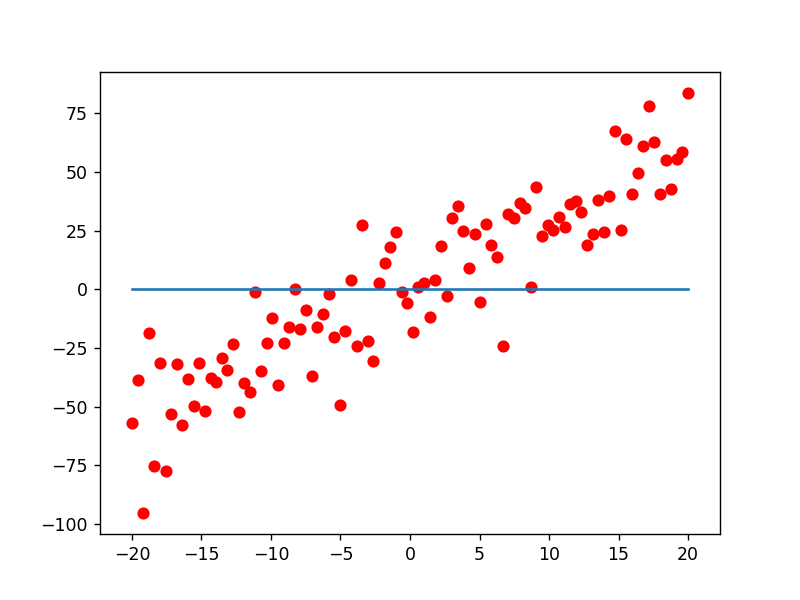

In [6]:
# Consider the model: a = m * x + c. We initialize the parameters m and c to 0 and then we will improvise as per error
# That is the "error correction" learning method

# Let's initialize 
m = 0
c = 0

# Let's make the initial prediction
a = m * x + c

# Let's see what it looks like
plt.plot(x,a)
plt.scatter(x,y,c = 'red')
plt.show()

In [7]:
# That was quite bad obviously. Let's also write a function that helps find total error

def totError(y,a):
    return ((y-a)**2).sum()

# Let's check the total error
totError(y,a)

138189.50369138474

### So the initial error is super high. Let's work on tweaking this error. In the class, we had derived the derivative of cost w.r.t the slope m comes out to be 2 * (a - y) * x and for that of intercept c comes out to be 2 * (a - y)

### By gradient descent, we know that we have to subtract some multiple of these derivatives to carry out this improvisation

In [8]:
# Gradient descent by finding derivatives pre-calculated
def gradientDescent(m,c,x,y,learning_rate):
    """
    This method of finding derivatives uses the generic caculus methods we are so very used to.
    """
    
    a = m * x + c # Finding the prediction for finding cost. a is a row vector
    deriv_cost_m = 2 * (a-y) * x # this gives a row vector that contains derivative of cost for each data point w.r.t m
    deriv_cost_c = 2 * (a-y) # similar. just derivative of C w.r.t c (the y-intercept)
    
    # We now have derivatives for each data point. So the question arises by which derivative do we tweak our parameters with?
    # Well inituitively the answer is: all. But instead of doing it one by one for each data point, why not just take the mean
    # and let the learning rate take care of scaling the change? We will do that only.
    deriv_cost_m = deriv_cost_m.mean()
    deriv_cost_c = deriv_cost_c.mean()
    
    # Return the tweaked parameters
    return m - learning_rate * deriv_cost_m,c - learning_rate * deriv_cost_c

In [12]:
# Initialize the parameters 
m = 0
c = 0

# Find improved parameters
m_improved,c_improved = gradientDescent(m,c,x,y,0.001)

In [13]:
# Checkout the improved slope
m_improved

0.7850604042630532

<IPython.core.display.Javascript object>


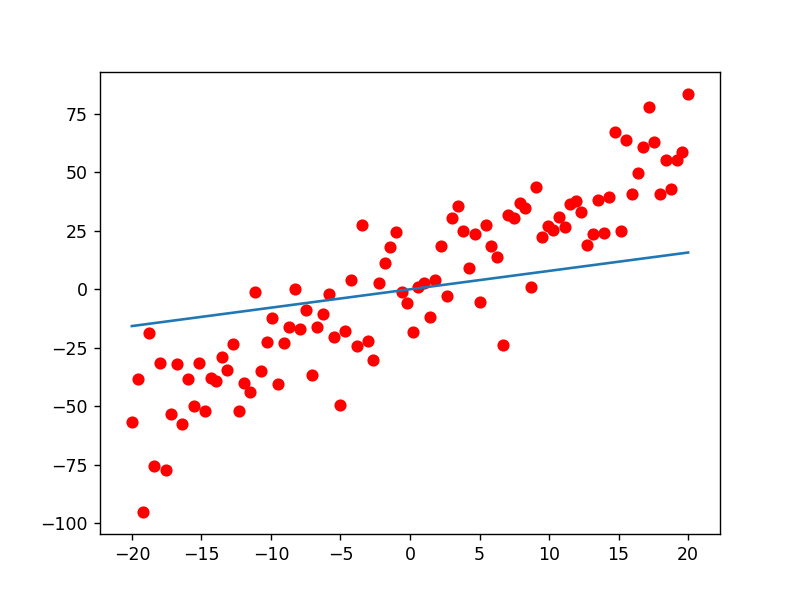

In [14]:
# Check out the improved results
a_improved = m_improved * x + c_improved
plt.plot(x,a_improved)
plt.scatter(x,y,c= 'red')
plt.show()

### Even in one iteration of improvement with learning rate 0.001, the curve fits so much better. You may experiment with various learning rates to experiment and see how things turn out to be. What is usually done is an attempt is made to find the optimal learning rate. A learning rate too high misses the trough and tends to jump over it and a learning rate too small makes the process of learning way too slow.

In [15]:
# A function for mean error. It is bit more inituitive than total error
def error(a,y):
    return ((a-y)**2).mean()

In [16]:
m = 0
c = 0
a = m_improved * x + c_improved
error(a,y)

849.4005537739332

error after 1 iterations is 849.4005537739332
error after 11 iterations is 250.11051440148444
error after 21 iterations is 248.96349905075473
error after 31 iterations is 248.8646547390065
error after 41 iterations is 248.77144123523556
error after 51 iterations is 248.68188932956713
error after 61 iterations is 248.59585225583004
error after 71 iterations is 248.51319205490663
error after 81 iterations is 248.43377618776157
error after 91 iterations is 248.3574773173988
error after 101 iterations is 248.28417310467776
error after 111 iterations is 248.21374601215197
error after 121 iterations is 248.1460831156072
error after 131 iterations is 248.08107592299672
error after 141 iterations is 248.0186202004826
error after 151 iterations is 247.9586158053053
error after 161 iterations is 247.90096652521297
error after 171 iterations is 247.84557992419235
error after 181 iterations is 247.79236719425538
error after 191 iterations is 247.74124301304246
error after 201 iterations is 247.692

<IPython.core.display.Javascript object>


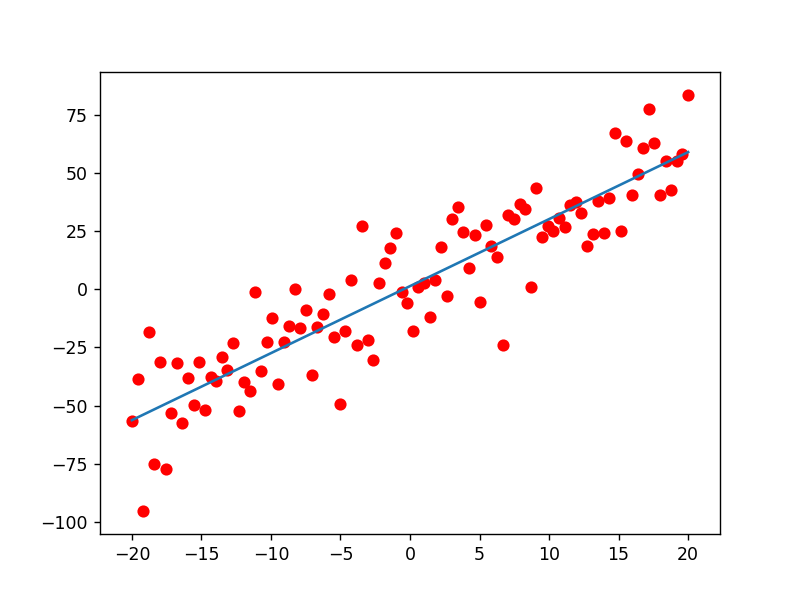

In [17]:
# Carrying out multiple iterations of gradient descent
m = 0
c = 0
epochs = 1000

errs = []

for i in range(epochs):
    m,c = gradientDescent(m,c,x,y,0.001)
    a = m * x + c
    err = error(a,y)
    if i%10 == 0:
        print("error after",str(i+1),"iterations is",str(error(a,y)))
    errs.append(err)
        

# Visualizing the final curve formed
a = m * x + c
plt.plot(x,a)
plt.scatter(x,y,c='red')
plt.show()

In [18]:
# Using the first principle to carry out the gradient descent : f'(x) = (f(x+h) - f(x))/h wherer h is a very small quantity
def gradDescent2(m,c,x,y,learning_rate):
    a = m * x + c
    cost = (a-y)**2
    
    # Choosing h as a small quantity
    h = 1e-6
    m_nudge = m + h # nudging m
    # finding cost with updated value of m
    a_m_nudge = m_nudge * x + c
    cost_m_nudge = (a_m_nudge - y)**2
    # Applying the value to find the cost
    cost_deriv_m_nudge = (cost_m_nudge - cost)/h
    
    # Taking mean of dervatives over all data points
    cost_deriv_m_nudge = cost_deriv_m_nudge.mean()
    
    
    # Same process for c
    c_nudge = c + h
    a_c_nudge = m * x + c_nudge
    cost_c_nudge = (a_c_nudge - y)**2
    cost_deriv_c_nudge = (cost_c_nudge - cost)/h
    
    cost_deriv_c_nudge = cost_deriv_c_nudge.mean()
    
    return m - learning_rate * cost_deriv_m_nudge, c - learning_rate * cost_deriv_c_nudge

<IPython.core.display.Javascript object>


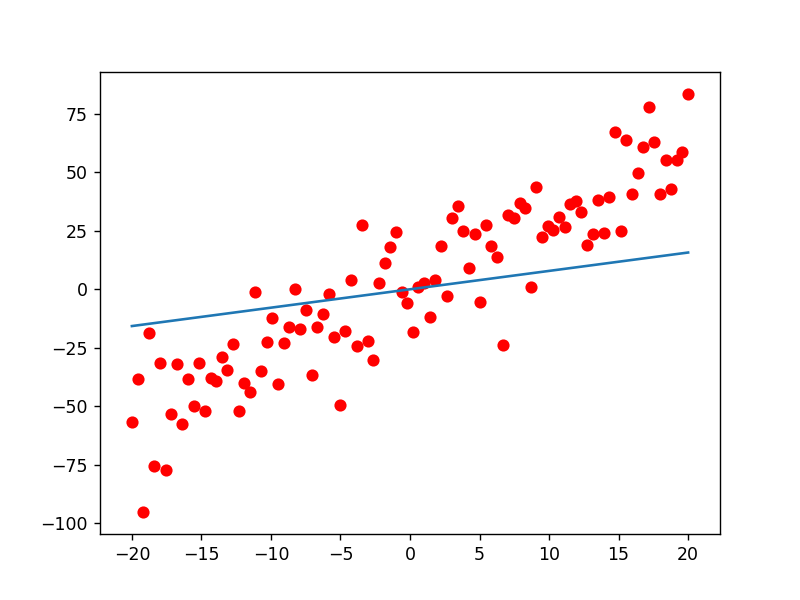

In [20]:
# If you carry out the same process for gradient descent but with different methodology, you will get similar results
# After all, the only thing we are doing differently is finding derivative bit differently
m = 0
c = 0

m_improved, c_improved = gradDescent2(m,c,x,y,0.001)

a_improved = m_improved * x + c_improved

plt.plot(x,a_improved)
plt.scatter(x,y,c = 'red')
plt.show()

### Why this is important is because here you aren't calculating the variable form of derivative. This becomes more convenient when the network is complex.

error after 1 iterations is 849.4006314878848
error after 11 iterations is 250.11052601179256
error after 21 iterations is 248.96349961353926
error after 31 iterations is 248.86465485245134
error after 41 iterations is 248.77144135508553
error after 51 iterations is 248.681889473271
error after 61 iterations is 248.59585242265646
error after 71 iterations is 248.513192243447
error after 81 iterations is 248.43377639653693
error after 91 iterations is 248.35747754499621
error after 101 iterations is 248.28417334981802
error after 111 iterations is 248.21374627372822
error after 121 iterations is 248.14608339238114
error after 131 iterations is 248.08107621392372
error after 141 iterations is 248.01862050455185
error after 151 iterations is 247.95861612150134
error after 161 iterations is 247.90096685257646
error after 171 iterations is 247.8455802618325
error after 181 iterations is 247.79236754121797
error after 191 iterations is 247.74124336852063
error after 201 iterations is 247.692

<IPython.core.display.Javascript object>


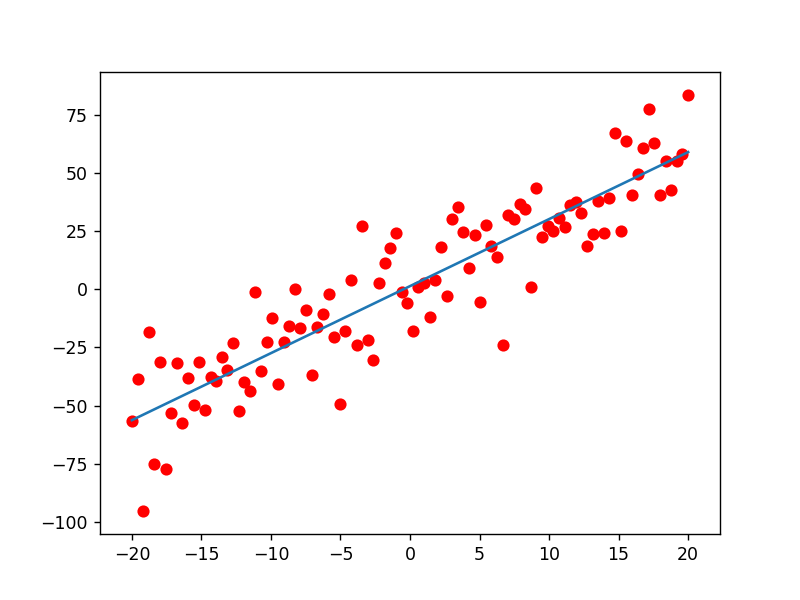

In [21]:
# Multiple iterations of the new gradient descent. Will get you similar results.
m = 0
c = 0
epochs = 1000

errs = []

for i in range(epochs):
    m,c = gradDescent2(m,c,x,y,0.001)
    a = m * x + c
    err = error(a,y)
    if i%10 == 0:
        print("error after",str(i+1),"iterations is",str(error(a,y)))
    errs.append(err)
        
a = m * x + c
plt.plot(x,a)
plt.scatter(x,y,c='red')
plt.show()

### Now the homework that I talked about will be ina different file. I have prepared some data and you have apply gradient descent using both methods above to fit a curve I will specify instead of mx + c into that data. This can be visualized as well. What is hard to visualize is curve fitting when there are multiple input variables. We will cover that in the 2nd part of this workshop.